1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

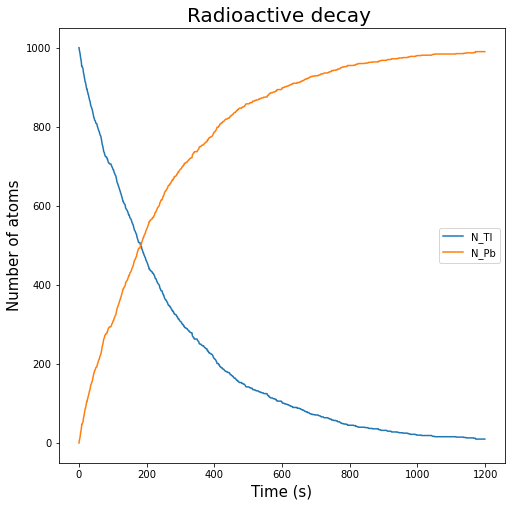

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as npr
npr.seed(2058080)

%matplotlib inline
t_half = (3.052*60)
T = (20*60) # period of detection
N_Tl = np.zeros(T)
N_Pb = np.zeros(T)
N_Tl[0] = 1000 # initial conditions
N_Pb[0] = 0

p = 1 - 2**(-1/t_half) 
# at every timestep we account the same probability of decay

for t in range (0,T-1):
    N_Tl[t+1] = N_Tl[t]
    N_Pb[t+1] = N_Pb[t]
    for i in range (0, int(N_Tl[t])):
        a = npr.rand()
        if a < p:
            N_Tl[t+1] = N_Tl[t+1]-1
            N_Pb[t+1] = N_Pb[t+1]+1

plt.figure(figsize = (8,8))
plt.plot(np.arange(T), N_Tl, label = "N_Tl")
plt.plot(np.arange(T), N_Pb, label = "N_Pb")
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Number of atoms", fontsize = 15)
plt.title("Radioactive decay ", fontsize = 20)
plt.legend()

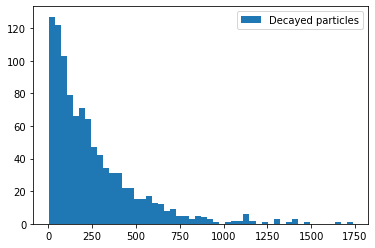

In [2]:
times = npr.exponential(t_half/np.log(2), size=(1000))
plt.hist(times, bins = 50, label = "Decayed particles") 
plt.legend()
plt.show() # histogram of the exponential distribution

Text(0.5, 1.0, 'Radioactive decay ')

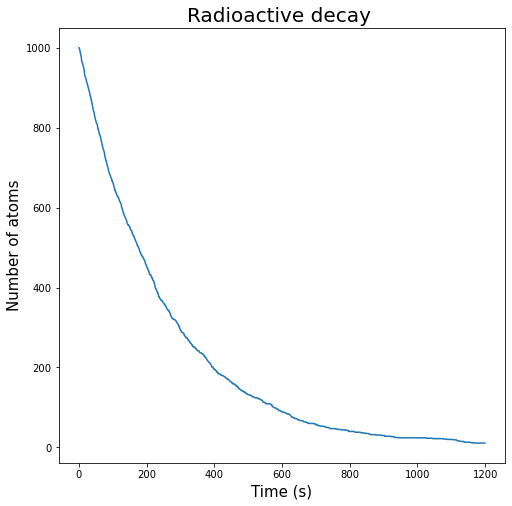

In [3]:
N_survived = np.zeros(T)
N_survived[0] = 1000
for t in range (1, T):
    N_survived[t] = len(times[times>t])

plt.figure(figsize = (8,8))
plt.plot(np.arange(T), N_survived)
plt.xlabel("Time (s)", fontsize = 15)
plt.ylabel("Number of atoms", fontsize = 15)
plt.title("Radioactive decay ", fontsize = 20)

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
Z = 79 
particles = 10**(6) 
e_charge = 1.602176565*10**(-19) 
E = 7.7*10**(6)*e_charge 
a0 = 5.2917721067*10**(-11) 
e0 = 8.8541878176*10**(-12)
sigma = a0/100
x = sigma*npr.randn(2, 10**6) # (x, y) distributed normally around (0, 0)
b = np.sqrt(x[0]**2+x[1]**2)

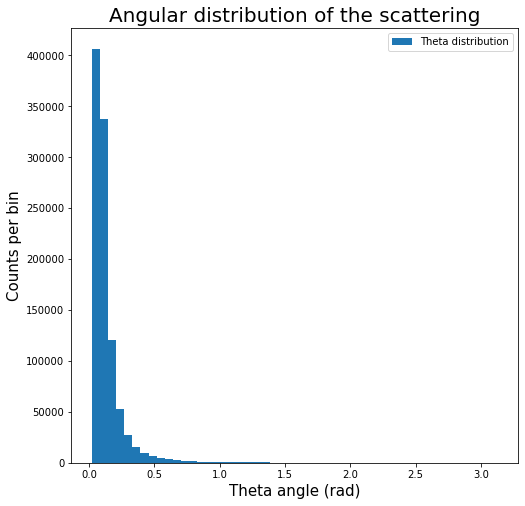

In [5]:
def theta(b, Z, e_charge, E, e0): # calculate theta given the impact parameter
    return 2*np.arctan((Z*e_charge**2)/(2*np.pi*e0*E*b))

angle = theta(b, Z, e_charge, E, e0)

plt.figure(figsize = (8,8))
plt.hist(angle, bins = 50, label = "Theta distribution")
plt.xlabel("Theta angle (rad)", fontsize = 15)
plt.ylabel("Counts per bin", fontsize = 15)
plt.title("Angular distribution of the scattering", fontsize = 20)
plt.legend()
plt.show()

In [6]:
part_ref = len(angle[angle > np.pi/2])/len(angle)
print("The fraction of reflected particles is: %.2f" % (100*part_ref), "%")

The fraction of reflected particles is: 0.16 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

The integral with the Monte Carlo method is: 1.452 +- 0.004


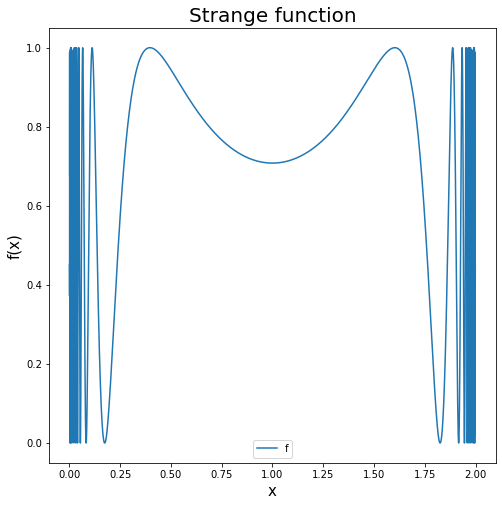

In [7]:
def f(x):
    return (np.sin(1/(x*(2-x))))**2

n = 10**4 # how much fit grid is
epsilon = 0.001 # we stay very close to x = 0 and x = 2
x = np.linspace(0+epsilon,2-epsilon,n)
plt.figure(figsize = (8,8))
plt.plot(x,f(x), label = "f")
plt.xlabel("x", fontsize = 15)
plt.ylabel("f(x)", fontsize = 15)
plt.title("Strange function", fontsize = 20)
plt.legend()

a = 2 # width of the window
h = 1 # heigth of the window
N = 10**5 # number of random shots

x_r = a*npr.rand(N)
y_r = h*npr.rand(N)
integral_mc = a*h*len(x_r[y_r < f(x_r)])/len(x_r)
err_mc = np.sqrt((integral_mc*a*h - integral_mc)/N)

print("The integral with the Monte Carlo method is: %.3f +- %.3f" % (integral_mc, err_mc))
plt.show()

In [8]:
integral_mv = (a/n)*np.sum(f(x))
err_mv = a*h*np.sqrt(np.var(f(x))/n)

print("The integral with the mean value method is: %.3f +- %.3f" % (integral_mv, err_mv))
# the two values are well compatible each other

The integral with the mean value method is: 1.452 +- 0.005


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [9]:
def f(x,y): # 3D function describing a cilinder of radius and height 1
    if x**2 + y**2 <= 1:
        return 1
    else:
        return 0

f_v = np.vectorize(f)

a = 2
h = 1
N = 10**7

x_r = a*npr.rand(N)-1
y_r = a*npr.rand(N)-1
z_r = h*npr.rand(N)

integral = a*a*h*len(x_r[z_r < f_v(x_r, y_r)])/N
err = np.sqrt((integral*a*a*h - integral_mc)/N)

print("The value of pi is: %.3f +- %.3f" % (integral, err))

The value of pi is: 3.141 +- 0.001


In [10]:
def f(x):
    result = np.zeros(x.shape[0])
    for i in range (0, x.shape[0]):
        r = np.linalg.norm(x[i])
        if r <= 1:
            result[i] = 1
        else:
            result[i] = 0
    return result

a = 2
h = 1
N = 10**7

x_r = a*npr.rand(N, 10)-1
z_r = h*npr.rand(N)

integral = (a**10)*h*len(z_r[z_r < f(x_r)])/N
err = np.sqrt((integral*(a**9)*h - integral_mc)/N)

print("The value of the hypervolume of a 10 D sphere or radius 1 is: %.2f +- %.2f" % (integral, err))

The value of the hypervolume of a 10 D sphere or radius 1 is: 2.57 +- 0.01


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

The integral with the Monte Carlo method is: 0.760


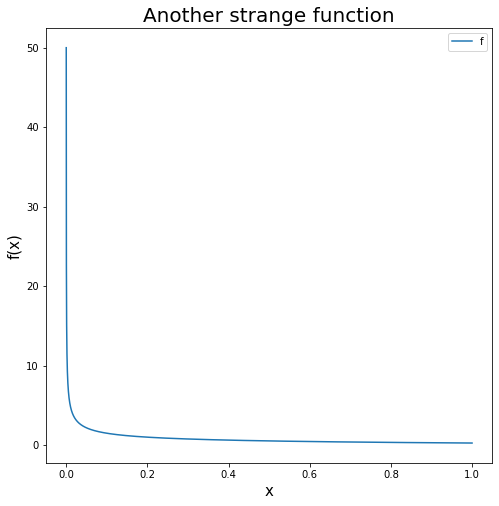

In [11]:
def f(x):
    return (x**(-1/2))/(np.exp(x) + 1)

def w(x):
    return x**(-1/2)

n = 10**5 # how much fit grid is
epsilon = 0.0001 # we stay very close to x = 0
x = np.linspace(0+epsilon,1,n)

plt.figure(figsize = (8,8))
plt.plot(x,f(x), label = "f")
plt.xlabel("x", fontsize = 15)
plt.ylabel("f(x)", fontsize = 15)
plt.title("Another strange function", fontsize = 20)
plt.legend()

integral_w = 2 # one can compute it analytically
integral = (integral_w/n)*np.sum(f(x)/w(x))

print("The integral with the Monte Carlo method is: %.3f" % (integral))
plt.show()
# The value is different from the 0.84 expected